In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
longformer_df = pd.read_json("/home/kdb36/L101-Project-FRESH-extension/outputs/movies/bert_classification/longformer/dev_out.jsonl", lines=True)
roberta_df = pd.read_json("/home/kdb36/L101-Project-FRESH-extension/outputs/movies/bert_classification/fresh/dev_out.jsonl", lines=True)


In [117]:
roberta_df.head()

,predicted_label,label,length,annotation_id
0,NEG,NEG,701,negR_800.txt
1,NEG,NEG,340,negR_801.txt
2,NEG,NEG,475,negR_802.txt
3,NEG,NEG,1086,negR_803.txt
4,NEG,NEG,497,negR_804.txt


In [118]:
longformer_df['tp'] = ((longformer_df['predicted_label'] == 'POS') & (longformer_df['label'] == 'POS')).astype(int)
longformer_df['fp'] = ((longformer_df['predicted_label'] == 'POS') & (longformer_df['label'] != 'POS')).astype(int)
longformer_df['tn'] = ((longformer_df['predicted_label'] == 'NEG') & (longformer_df['label'] == 'NEG')).astype(int)
longformer_df['fn'] = ((longformer_df['predicted_label'] == 'NEG') & (longformer_df['label'] != 'NEG')).astype(int)

roberta_df['tp'] = ((roberta_df['predicted_label'] == 'POS') & (roberta_df['label'] == 'POS')).astype(int)
roberta_df['fp'] = ((roberta_df['predicted_label'] == 'POS') & (roberta_df['label'] != 'POS')).astype(int)
roberta_df['tn'] = ((roberta_df['predicted_label'] == 'NEG') & (roberta_df['label'] == 'NEG')).astype(int)
roberta_df['fn'] = ((roberta_df['predicted_label'] == 'NEG') & (roberta_df['label'] != 'NEG')).astype(int)

In [119]:
grouped_longformer = longformer_df.groupby(pd.cut(longformer_df['length'], [0, 512, 4096])).sum()
grouped_roberta = roberta_df.groupby(pd.cut(roberta_df['length'], [0, 512, 4096])).sum()

grouped_longformer['f1'] = grouped_longformer['tp'] / (grouped_longformer['tp'] + 0.5*(grouped_longformer['fp'] + grouped_longformer['fn']))
grouped_roberta['f1'] = grouped_roberta['tp'] / (grouped_roberta['tp'] + 0.5*(grouped_roberta['fp'] + grouped_roberta['fn']))  

/tmp/ipykernel_2166173/1257265452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_longformer = longformer_df.groupby(pd.cut(longformer_df['length'], [0, 512, 4096])).sum()
/tmp/ipykernel_2166173/1257265452.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_roberta = roberta_df.groupby(pd.cut(roberta_df['length'], [0, 512, 4096])).sum()


In [120]:
grouped_longformer

,length,tp,fp,tn,fn,f1
length,,,,,,
"(0, 512]",16964,13,2,26,4,0.812500
"(512, 4096]",135327,76,6,66,7,0.921212


Text(0.5, 1.0, '$F_1$ Score for the positive class on the dev dataset')

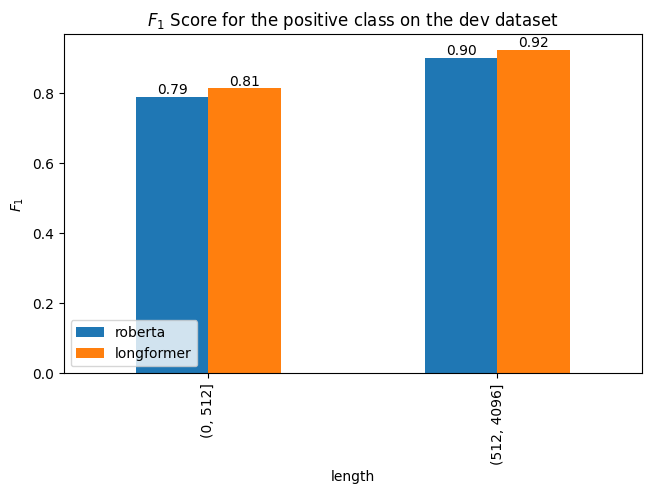

In [128]:
res_df = pd.DataFrame({'roberta': grouped_roberta['f1'], 'longformer': grouped_longformer['f1']})
ax = res_df.plot.bar()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.legend(loc='lower left')
plt.ylabel('$F_1$')
plt.title("$F_1$ Score for the positive class on the dev dataset")

In [39]:
df_lengths = pd.read_json("/home/kdb36/L101-Project-FRESH-extension/outputs/movies/bert_classification/longformer/train_out.jsonl", lines=True) 
df_rationale = pd.read_json("/home/kdb36/L101-Project-FRESH-extension/outputs/movies/bert_classification/longformer/wrapper_saliency/train.jsonl", lines=True)

In [40]:
df_lengths['annotation_id']

0       negR_000.txt
1       negR_001.txt
2       negR_002.txt
3       negR_003.txt
4       negR_004.txt
            ...     
1595    posR_795.txt
1596    posR_796.txt
1597    posR_797.txt
1598    posR_798.txt
1599    posR_799.txt
Name: annotation_id, Length: 1600, dtype: object

In [41]:
df = df_lengths.merge(df_rationale, on='annotation_id')
df['rationale_length'] = df['human_rationale'].apply(lambda x: sum([b-a for a,b in x]))

In [42]:
df.groupby('label_x').count()

,predicted_label,length,annotation_id,human_rationale,document,label_y,saliency,rationale_length
label_x,,,,,,,,
NEG,800,800,800,800,800,800,800,800
POS,800,800,800,800,800,800,800,800
